In [ ]:
!pip install FlowCal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.2 MB/s eta 0:00:00
  Created wheel for FlowCal: filename=FlowCal-1.3.0-py3-none-any.whl size=84525 sha256=e40b6e0732a5ccb9b0644e09a3c56b7fa2a6a9af9161055705de53fc1ab5c594
  Stored in directory: /root/.cache/pip/wheels/b1/9c/f3/4c59694424e6a6d70b11b66f076d8a2359b57dfdb9b723ed3f
Successfully built FlowCal
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
!pip install joypy


In [45]:
import FlowCal
import matplotlib.pyplot as plt
import numpy as np


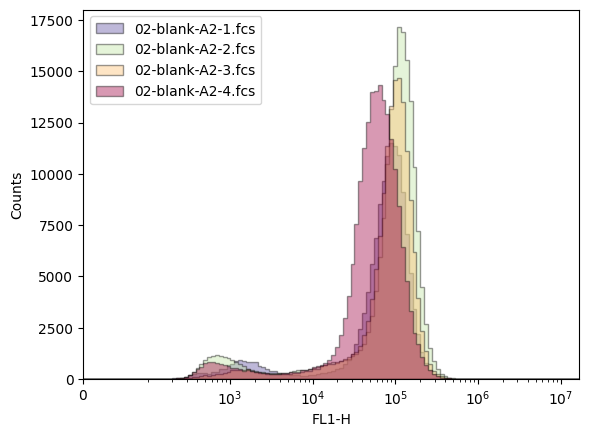

In [46]:
filenames = ['02-blank-A2-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.4, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


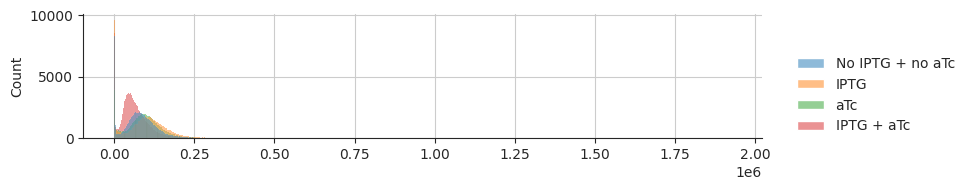

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("ticks", {'axes.grid': True})
g = sns.displot(data=df, ax= ax, height= 2, aspect=4)
ax.set_ylim(0, 2000)
ax.set_xlim(0, 1000000)
plt.show()


In [48]:
d1 = FlowCal.io.FCSData('02-blank-A2-1.fcs')

d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()

d2 = FlowCal.io.FCSData('02-blank-A2-2.fcs')

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()

d3 = FlowCal.io.FCSData('02-blank-A2-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()

d4 = FlowCal.io.FCSData('02-blank-A2-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()

import pandas as pd

df1 = pd.DataFrame(d1_list)
df2 = pd.DataFrame(d2_list)
df3 = pd.DataFrame(d3_list)
df4 = pd.DataFrame(d4_list)

df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df


,No IPTG + no aTc,IPTG,aTc,IPTG + aTc
0,558.900024,118833.703125,364.700012,16375.799805
1,407.299988,118943.601562,358.100006,96679.101562
2,431.899994,87353.796875,315.000000,68153.296875
3,337.399994,100892.000000,351.299988,31386.599609
4,179.199997,68235.898438,503.299988,35502.199219
...,...,...,...,...
197690,NaN,NaN,NaN,62866.000000
197691,NaN,NaN,NaN,675.099976
197692,NaN,NaN,NaN,78127.101562
197693,NaN,NaN,NaN,50111.800781


In [49]:
drop_indices = np.random.choice(df2.index, 55000, replace=False)
df2_new = df2.drop(drop_indices)

drop_indices = np.random.choice(df3.index, 25000, replace=False)
df3_new = df3.drop(drop_indices)

drop_indices = np.random.choice(df4.index, 25000, replace=False)
df4_new = df4.drop(drop_indices)


In [50]:
df = pd.concat([df1, df2_new, df3_new, df4_new], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df


,No IPTG + no aTc,IPTG,aTc,IPTG + aTc
0,558.900024,NaN,364.700012,16375.799805
1,407.299988,118943.601562,358.100006,96679.101562
2,431.899994,NaN,315.000000,68153.296875
3,337.399994,100892.000000,351.299988,31386.599609
4,179.199997,68235.898438,503.299988,35502.199219
...,...,...,...,...
197690,NaN,NaN,NaN,62866.000000
197691,NaN,NaN,NaN,675.099976
197692,NaN,NaN,NaN,78127.101562
197693,NaN,NaN,NaN,50111.800781


In [51]:
log_df = df.apply(np.log10)


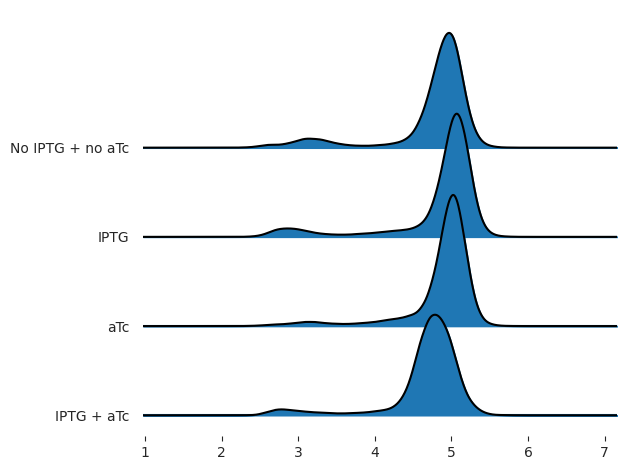

In [52]:
import joypy
import numpy as np

fig, axes = joypy.joyplot(log_df)


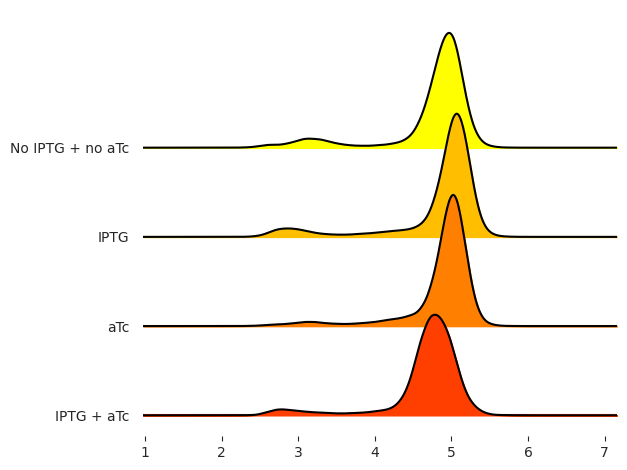

In [53]:
fig, axes = joypy.joyplot(log_df, colormap=plt.cm.autumn_r)


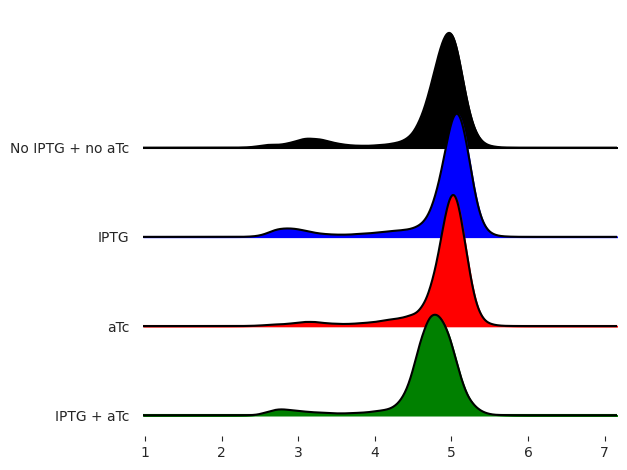

In [54]:
fig, axes = joypy.joyplot(log_df, color=["k","b","r","g"])


ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 4 colors were provided

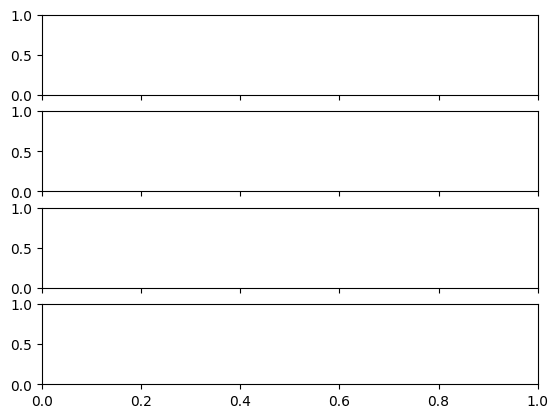

In [ ]:
fig, axes = joypy.joyplot(log_df, hist= True, color= ["k","b","r","g"])


ValueError: RGBA sequence should have length 3 or 4

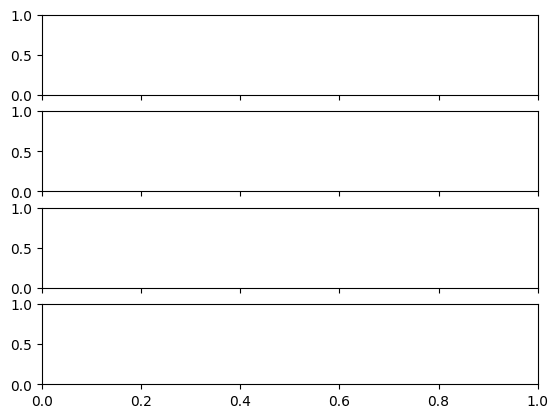

In [ ]:
fig, axes = joypy.joyplot(log_df, hist= True, color=[["k"], ["b"], ["r"], ["g"]])


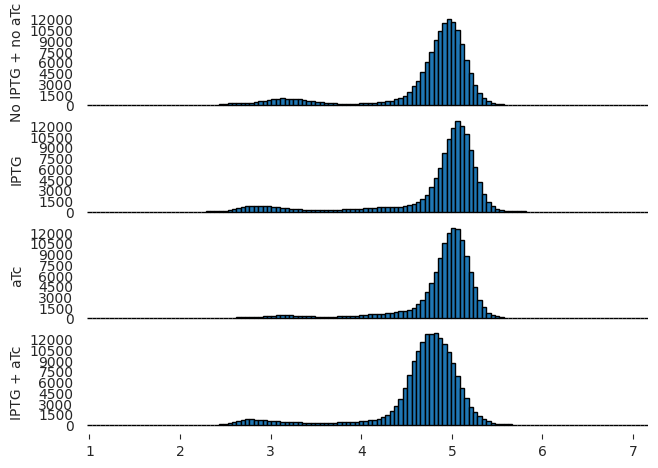

In [55]:
import joypy
from matplotlib.ticker import MaxNLocator, ScalarFormatter

fig, axes = joypy.joyplot(log_df, fill= True, hist= True, bins=128, overlap = 0)

for ax in axes[:-1]:
    ax.set_ylabel(ax.get_yticklabels()[0].get_text())
    ax.yaxis.set_major_locator(MaxNLocator())
    ax.yaxis.set_major_formatter(ScalarFormatter())
fig.subplots_adjust(left=0.1)


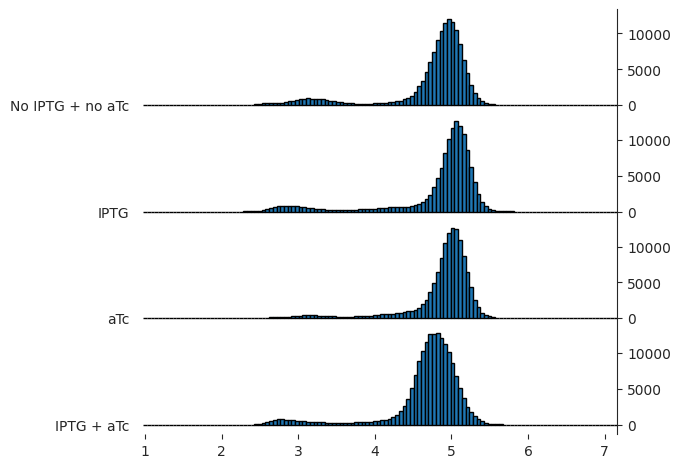

In [56]:
import joypy

fig, axes = joypy.joyplot(log_df, fill= True, hist= True, bins=128, overlap = 0)

for ax in axes[:-1]:  # last axis is just for global settings
    ax.secondary_yaxis('right', functions= (lambda x:x, lambda x:x))


In [93]:
d1 = FlowCal.io.FCSData('02-blank-A3-1.fcs')

d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()

d2 = FlowCal.io.FCSData('02-blank-A3-2.fcs')

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()

d3 = FlowCal.io.FCSData('02-blank-A3-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()

d4 = FlowCal.io.FCSData('02-blank-A3-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()

import pandas as pd

df1 = pd.DataFrame(d1_list)
df2 = pd.DataFrame(d2_list)
df3 = pd.DataFrame(d3_list)
df4 = pd.DataFrame(d4_list)

df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df

drop_indices = np.random.choice(df1.index, 45000, replace=False)
df1_new = df1.drop(drop_indices)

drop_indices = np.random.choice(df3.index, 40000, replace=False)
df3_new = df3.drop(drop_indices)

drop_indices = np.random.choice(df4.index, 115000, replace=False)
df4_new = df4.drop(drop_indices)

df = pd.concat([df1_new, df2, df3_new, df4_new], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df

log_df = df.apply(np.log10)


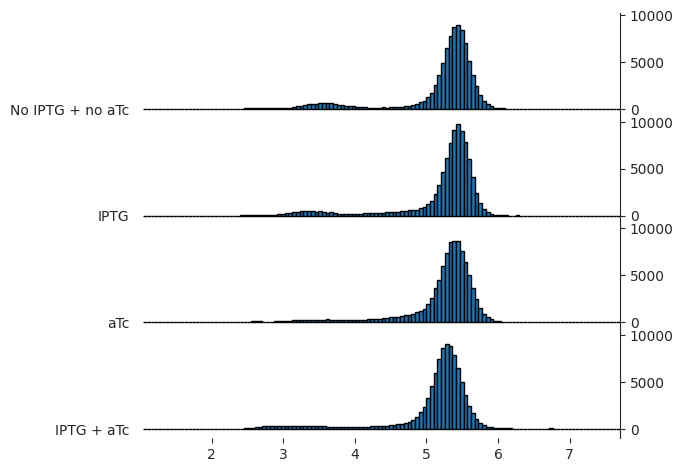

In [94]:
import joypy

fig, axes = joypy.joyplot(log_df, fill= True, hist= True, bins=128, overlap = 0)

for ax in axes[:-1]:  # last axis is just for global settings
    ax.secondary_yaxis('right', functions= (lambda x:x, lambda x:x))


In [131]:
d1 = FlowCal.io.FCSData('02-blank-A4-1.fcs')

d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()

d2 = FlowCal.io.FCSData('02-blank-A4-2.fcs')

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()

d3 = FlowCal.io.FCSData('02-blank-A4-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()

d4 = FlowCal.io.FCSData('02-blank-A4-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()

import pandas as pd

df1 = pd.DataFrame(d1_list)
df2 = pd.DataFrame(d2_list)
df3 = pd.DataFrame(d3_list)
df4 = pd.DataFrame(d4_list)

df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df

drop_indices = np.random.choice(df1.index, 18387, replace=False)
df1_new = df1.drop(drop_indices)

drop_indices = np.random.choice(df3.index, 17586, replace=False)
df3_new = df3.drop(drop_indices)

drop_indices = np.random.choice(df4.index, 173698, replace=False)
df4_new = df4.drop(drop_indices)

df = pd.concat([df1_new, df2, df3_new, df4_new], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df

log_df = df.apply(np.log10)


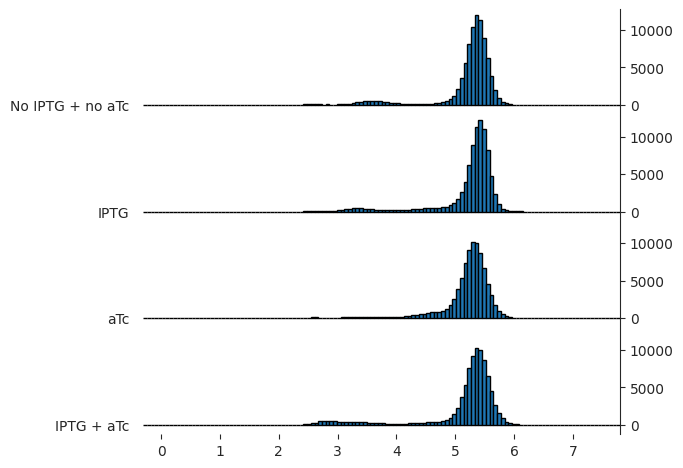

In [132]:
import joypy

fig, axes = joypy.joyplot(log_df, fill= True, hist= True, bins=128, overlap = 0)

for ax in axes[:-1]:  # last axis is just for global settings
    ax.secondary_yaxis('right', functions= (lambda x:x, lambda x:x))
